# Lab 5

### Sofia Garrick - 05/17/20

#### OBJECTIVES

In this lab, I will be building off the examples laid out in the python geopandas tutorials by sjsrey. Specifically, I will be expanding on one example from the Geopandas Geoprocessing chapter and one example from the Geovisualization chapter. 

---

##### GEOPANDAS GEOPROCESSING

In this example, we will be finding the intersection between two shapefiles and then plotting a nice customized map of their intersection. The subject of this map with be truck routes in California, specifically LA county. The shapefile that we will upload for truck files spans all of California. Therefore, our intersection will isolate the routes only in LA county. 

*set up*

In [34]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

*read in LA county shapefile from [LA Geohub](http://geohub.lacity.org/datasets/7835077624374b9fa65676443ba7a578_19)*

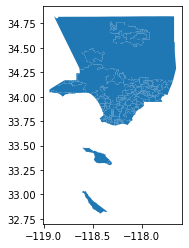

In [35]:
LA = gpd.read_file('data/City_Boundaries.shp')
LA.plot()

*read in Truck Route shapefile from database*

In [36]:
trucks = gpd.read_file('data/Truck_Route_Network.shp')

Since we will be using the boundaries of the LA county shapefile to find the intersection with the Truck Route shapefile, we need to remove the others tracts to create the simplest version possible. 

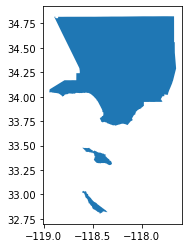

In [37]:
LA['dummy'] = 1.0
LAboun = LA.dissolve(by='dummy')
LAboun.plot()

Next, it's time for the intersection. To do this we start by using lambdas which allows us to isolate the the truck routes that coincide with the simple LA county boundary shapefile we just made. 

In [38]:
t = trucks['geometry']
t.apply(lambda x: x.intersects(LAboun.iloc[0]['geometry']))

0      False
1       True
2       True
3       True
4       True
       ...  
961    False
962    False
963    False
964    False
965    False
Name: geometry, Length: 966, dtype: bool

In [41]:
troute = t[t.apply(lambda x: x.intersects(LAboun.iloc[0]['geometry']))]

*let's check out what our isolated truck routes look like*

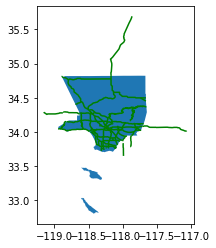

In [44]:
#set plot space
ax = plt.gca()
#determine plots to overlay
troute.plot(ax=ax, edgecolor='g')
LAboun.plot(ax=ax)
#plot
plt.show()

As we can see, the isolation didn't completely cut out the parts of the route that extend out from LA county. So we will utilize a for loop to further refine the intersection. This for loop will test each segment that intersects with the LA county boundary then generate a list.

In [46]:
geoms = []
for idx, route in enumerate(troute):
    print(idx)
    geoms.append(route.intersection(LAboun.iloc[0]['geometry']))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71


*plot the isolated truck routes to make sure above code worked properly*

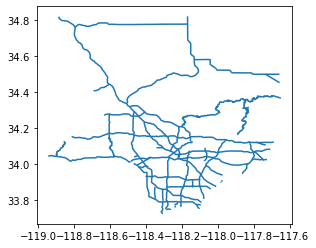

In [47]:
# combine the the list into a geometry column and then plot 
tLA = gpd.GeoSeries(geoms)
tLA.plot()

Now that we can see the intersection worked and is more refined, we can plot the original LA county shapefile with the truck routes super imposed and add color changes, transparency, and a title. 

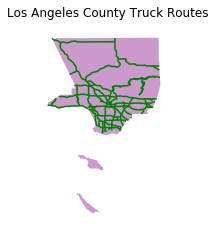

In [48]:
#set plot space
ax = plt.gca()

# determine maps to overlay
LAboun.plot(ax=ax, color = 'purple', alpha=0.4)
tLA.plot(ax=ax, edgecolor='g', linewidth = 1.5 )

#customizations
ax.set_axis_off()
ax.set_xlim(-119.0, -117.5); ax.set_ylim(32.5, 35)
ax.set(title='Los Angeles County Truck Routes')
ax.set_aspect('equal')

#plot
plt.show()

---

##### GEOVISUALIZATION

In this next example we are going to explore more of mapping, customization capabilities specifically looking at Value-by-Alpha. This map looks at two variables x and y. The value of the x variable determines the color of the map while the value of the y variable determines it transparency. Using this technique we can map two variables at once to compare their effects and any spatial patterns that may arise.

*set up*

In [15]:
from pysal.viz import mapclassify
import geopandas as gpd
import matplotlib.pyplot as plt
from pysal.viz import splot
from pysal.viz.splot.mapping import vba_choropleth

*import shapefile*

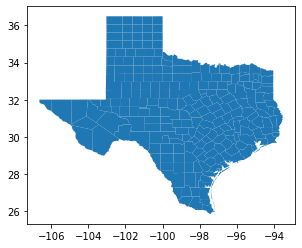

In [6]:
texas = gpd.read_file('data/texas.shp')
texas.plot()

*determine x and y values*

In [13]:
x = texas['HR70'].values
y = texas['GI69'].values

*now we plot the map!*

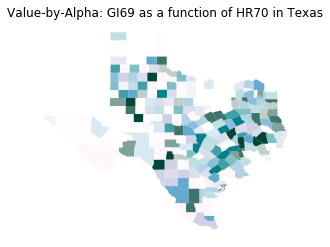

In [32]:
# Create new plot space
ax = plt.gca()

# then add the value-by-alpha element
vba_choropleth(x, y, texas, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='PuBuGn', ax = ax)
ax.set(title='Value-by-Alpha: GI69 as a function of HR70 in Texas')

# plot
plt.show()